In [1]:
# Find all logs for ratings
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

allLogFiles = os.listdir('RatingResultLog/Logfiles')
cleanAllLogFiles = [i for i in allLogFiles if 'DYNRAT' in i and '_' not in i]
cleanAllLogFiles.sort()
print(len(cleanAllLogFiles))
tmp_pid = [i for i in range(1, 27) if i not in [3, 7, 8]]
pids = []
for i in tmp_pid:
    if i // 10 == 0:
        pids.append('my' + '0' + str(i))
    else:
        pids.append('my' + str(i))
print(pids)
def generate_tables(pid):
    tables = [i for i in cleanAllLogFiles if pid in i]
    # print(tables)
    rootPath = 'RatingResultLog/Logfiles'
    df1 = pd.read_csv(os.path.join(rootPath, tables[0]), sep='\t')
    df2 = pd.read_csv(os.path.join(rootPath, tables[1]), sep='\t')
    df = pd.concat([df1, df2], ignore_index=True)

    df['emotion_category'] = df['code'].apply(lambda x: 'An' if x in [10, 20] else 'Ha')
    df['emotion_type'] = df['code'].apply(lambda x: 'prototype' if x in [10, 30] else 'BO')
    
    new_order = ['code', 'emotion_category', 'emotion_type'] + [col for col in df if col not in ['code', 'emotion_category', 'emotion_type']]
    df = df[new_order]
    # print(df)
    grouped_means = df.groupby('code')[['valence', 'arousal', 'humanlike']].mean()
    # print(grouped_means)

    return df, grouped_means
    
    

ALLTables = []
AVERTables = []
for pid in pids:
    tmpALLTable, tmpAVERTable = generate_tables(pid)
    tmpALLTable['participant_id'] = pid
    tmpAVERTable['participant_id'] = pid
    ALLTables.append(tmpALLTable)
    AVERTables.append(tmpAVERTable)
# print(cleanAllLogFiles)

AVERTables = pd.concat(AVERTables)
AVERTables.reset_index(inplace=True)
AVERTables['emotion_category'] = AVERTables['code'].apply(lambda x: 'An' if x in [10, 20] else 'Ha')
AVERTables['emotion_type'] = AVERTables['code'].apply(lambda x: 'prototype' if x in [10, 30] else 'BO')
new_order = ['participant_id', 'code', 'emotion_category', 'emotion_type'] + [col for col in AVERTables if col not in ['participant_id', 'code', 'emotion_category', 'emotion_type']]
AVERTables = AVERTables[new_order]
print(AVERTables)

52
['my01', 'my02', 'my04', 'my05', 'my06', 'my09', 'my10', 'my11', 'my12', 'my13', 'my14', 'my15', 'my16', 'my17', 'my18', 'my19', 'my20', 'my21', 'my22', 'my23', 'my24', 'my25', 'my26']
   participant_id  code emotion_category emotion_type   valence   arousal  \
0            my01    10               An    prototype  3.133333  3.800000   
1            my01    20               An           BO  2.933333  5.200000   
2            my01    30               Ha    prototype  4.666667  1.933333   
3            my01    40               Ha           BO  4.066667  2.266667   
4            my02    10               An    prototype  5.200000  5.266667   
..            ...   ...              ...          ...       ...       ...   
87           my25    40               Ha           BO  4.533333  6.066667   
88           my26    10               An    prototype  2.733333  4.933333   
89           my26    20               An           BO  2.333333  5.466667   
90           my26    30               Ha  

In [43]:
AVERTables.to_csv('mimicry_aver.csv')

In [3]:
import pandas as pd
filePath = 'RatingResultLog/Logfiles/DYNRAT1-my01.txt'

df = pd.read_csv(filePath, sep='\t')
# print(df)

In [4]:
# Group the data by 'code' and calculate the mean for each group
grouped_means = df.groupby('code')[['valence', 'arousal', 'humanlike']].mean()

print(grouped_means)

       valence   arousal  humanlike
code                               
10    3.000000  3.857143   7.285714
20    2.857143  5.142857   7.285714
30    4.571429  2.142857   4.142857
40    4.428571  1.857143   4.285714


In [5]:
import os
os.path.exists('RatingResultLog/Logfiles/DYNRAT2-my01.txt')

True

In [6]:
df2 = pd.read_csv('RatingResultLog/Logfiles/DYNRAT2-my01.txt', sep='\t')
# print(df2)
grouped_means2 = df2.groupby('code')[['valence', 'arousal', 'humanlike']].mean()
print(grouped_means2)

      valence  arousal  humanlike
code                             
10       3.25    3.750      7.125
20       3.00    5.250      6.750
30       4.75    1.750      4.750
40       3.75    2.625      4.750


In [ ]:
# concat two tables


# ANOVA analysis

In [12]:
import pandas as pd

# Load the data
data = pd.read_csv('mimicry_aver_long.csv')

# Display the first few rows to confirm it's loaded correctly
print(data.head())

   ...1 participant_id  code emotion_category emotion_type    measure  \
0     0           my01    10               An    prototype    valence   
1     0           my01    10               An    prototype    arousal   
2     0           my01    10               An    prototype  humanlike   
3     1           my01    20               An           BO    valence   
4     1           my01    20               An           BO    arousal   

      value  
0  3.133333  
1  3.800000  
2  7.200000  
3  2.933333  
4  5.200000  


In [11]:
# import pingouin as pg
# import pprint
# data = pg.read_dataset('rm_anova')
# pprint.pprint(data)

     Subject  Gender  Region Education  DesireToKill Disgustingness  \
0          1  Female   North      some          10.0           High   
1          1  Female   North      some           9.0           High   
2          1  Female   North      some           6.0            Low   
3          1  Female   North      some           6.0            Low   
4          2  Female   North   advance          10.0           High   
..       ...     ...     ...       ...           ...            ...   
367       99  Female   North      some           9.0            Low   
368      100  Female  Europe      some           3.0           High   
369      100  Female  Europe      some           2.0           High   
370      100  Female  Europe      some           5.5            Low   
371      100  Female  Europe      some           5.5            Low   

    Frighteningness  
0              High  
1               Low  
2              High  
3               Low  
4              High  
..             

In [13]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pingouin as pg
# ANOVA for each measure
for measure in data['measure'].unique():
    aov = pg.rm_anova(dv='value', within=['emotion_category', 'emotion_type'],
                  subject='participant_id', data=data[data['measure'] == measure], detailed=True, effsize="np2")
    # model = ols(f'value ~ C(emotion_category) * C(emotion_type)', data=data[data['measure'] == measure]).fit()
    # anova_table = sm.stats.anova_lm(model, typ=2)  # Type 2 ANOVA DataFrame
    print(f'ANOVA for {measure}:')
    print(aov)
    print('\n')


ANOVA for valence:
                            Source         SS  ddof1  ddof2         MS  \
0                 emotion_category  60.274831      1     22  60.274831   
1                     emotion_type   8.240048      1     22   8.240048   
2  emotion_category * emotion_type   3.600435      1     22   3.600435   

           F     p-unc  p-GG-corr       np2  eps  
0  15.133358  0.000788   0.000788  0.407541  1.0  
1  19.495018  0.000219   0.000219  0.469816  1.0  
2   8.398150  0.008344   0.008344  0.276272  1.0  


ANOVA for arousal:
                            Source         SS  ddof1  ddof2         MS  \
0                 emotion_category  57.923913      1     22  57.923913   
1                     emotion_type   0.156957      1     22   0.156957   
2  emotion_category * emotion_type  17.916957      1     22  17.916957   

           F         p-unc     p-GG-corr       np2  eps  
0  41.028650  1.912055e-06  1.912055e-06  0.650952  1.0  
1   0.671546  4.213027e-01  4.213027e-01  0.02

In [46]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# For simplicity, example of analyzing main effects after significant interaction
# Adjust for all combinations of categories within each measure
for measure in data['measure'].unique():
    tukey = pairwise_tukeyhsd(endog=data[data['measure'] == measure]['value'],
                              groups=data[data['measure'] == measure]['emotion_category'],
                              alpha=0.05)
    print(f'Tukey HSD results for {measure}:')
    print(tukey)


Tukey HSD results for valence:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
    An     Ha   1.6188   0.0 1.0446 2.1931   True
-------------------------------------------------
Tukey HSD results for arousal:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
    An     Ha   -1.587   0.0 -2.0718 -1.1021   True
---------------------------------------------------
Tukey HSD results for humanlike:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    An     Ha  -0.6377 0.0365 -1.2345 -0.0408   True
----------------------------------------------------


# Seperate the data into three csv

In [1]:
import pandas as pd

# Load the data
df = pd.read_csv('mimicry_aver_long.csv')

In [8]:
df

,index,participant_id,code,emotion_category,emotion_type,measure,value
0,0,my01,10,An,prototype,valence,3.133333
1,0,my01,10,An,prototype,arousal,3.800000
2,0,my01,10,An,prototype,humanlike,7.200000
3,1,my01,20,An,BO,valence,2.933333
4,1,my01,20,An,BO,arousal,5.200000
...,...,...,...,...,...,...,...
271,90,my26,30,Ha,prototype,arousal,4.266667
272,90,my26,30,Ha,prototype,humanlike,3.000000
273,91,my26,40,Ha,BO,valence,3.400000
274,91,my26,40,Ha,BO,arousal,3.733333


Results for valence:
An vs. Ha: less
T-statistic: -5.600633585884782
P-value: 1.1484815187447994e-07


/var/folders/wb/jy1t2kqj0lv_nb556t9s93w40000gn/T/ipykernel_62311/2585729816.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='emotion_category', y='value', data=plot_data, showfliers=False, palette=['#ff9999', '#66b3ff'])


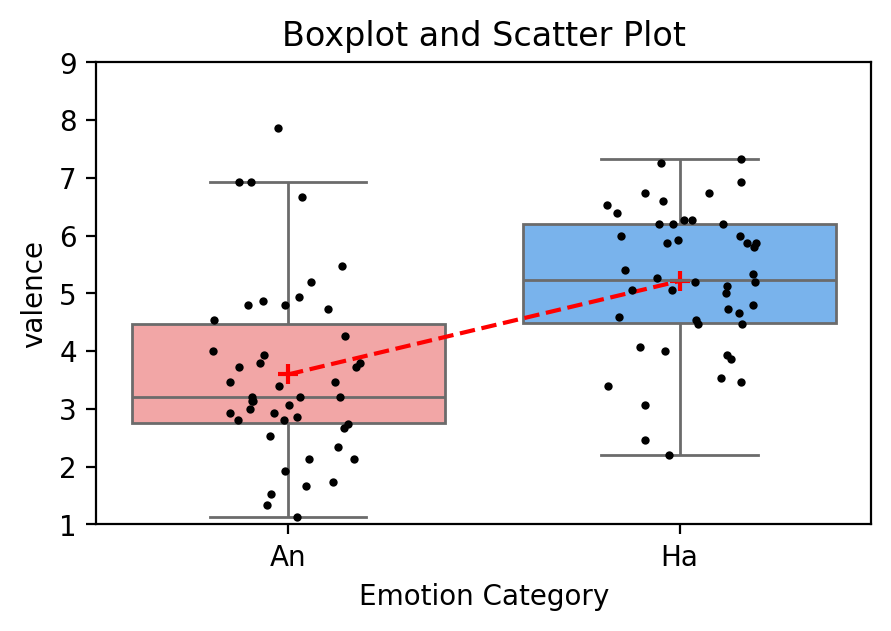

Results for arousal:
An vs. Ha: greater
T-statistic: 6.503053596183862
P-value: 2.152459714311436e-09


/var/folders/wb/jy1t2kqj0lv_nb556t9s93w40000gn/T/ipykernel_62311/2585729816.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='emotion_category', y='value', data=plot_data, showfliers=False, palette=['#ff9999', '#66b3ff'])


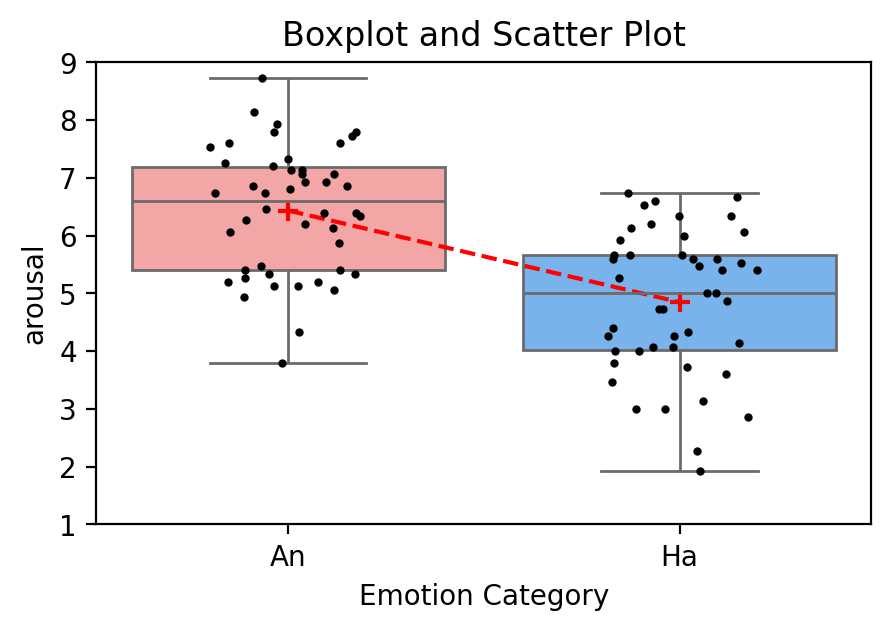

Results for humanlike:
An vs. Ha: greater
T-statistic: 2.12261557809846
P-value: 0.018266044600642142


/var/folders/wb/jy1t2kqj0lv_nb556t9s93w40000gn/T/ipykernel_62311/2585729816.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='emotion_category', y='value', data=plot_data, showfliers=False, palette=['#ff9999', '#66b3ff'])


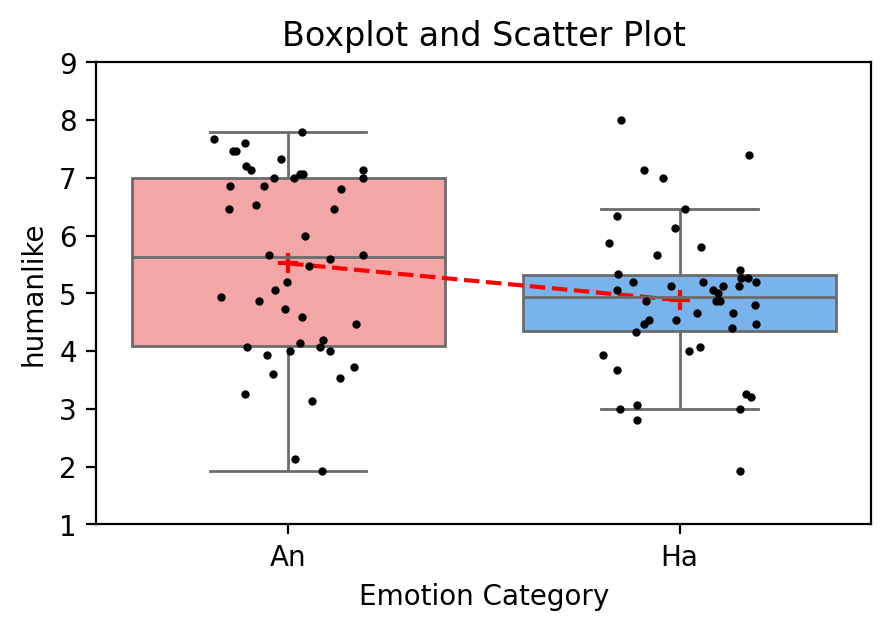

In [6]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the provided CSV file
file_path = 'mimicry_aver_long.csv'
data = pd.read_csv(file_path)

measure_types = df['measure'].unique()
for measure in measure_types:
    # Filter the data for the current measure
    measure_data = data[data['measure'] == measure]

    # Perform the one-tailed t-test
    if measure == 'valence':
        cur_test = 'less'
        t_stat, p_value = stats.ttest_ind(measure_data[measure_data['emotion_category'] == 'An']['value'],
                                          measure_data[measure_data['emotion_category'] == 'Ha']['value'],
                                          alternative='less')
    else:
        cur_test = 'greater'
        t_stat, p_value = stats.ttest_ind(measure_data[measure_data['emotion_category'] == 'An']['value'],
                                      measure_data[measure_data['emotion_category'] == 'Ha']['value'],
                                      alternative='greater')

    # Print the results
    print(f"Results for {measure}:")
    print(f'An vs. Ha: {cur_test}')
    print("T-statistic:", t_stat)
    print("P-value:", p_value)
    # print('\n')

    try:
        # Filter the data for angry and happy emotion categories
        angry_data = measure_data[measure_data['emotion_category'] == 'An']
        happy_data = measure_data[measure_data['emotion_category'] == 'Ha']

        # Combine the data for plotting
        plot_data = pd.concat([angry_data, happy_data])
        # plot_data.to_csv(f'plot_data{measure}.csv')

        # Create the boxplot and scatter plot
        plt.figure(figsize=(5, 3), dpi=200)

        # set y axis limit
        plt.ylim(1, 9)

        # Boxplot
        sns.boxplot(x='emotion_category', y='value', data=plot_data, showfliers=False, palette=['#ff9999', '#66b3ff'])

        # Scatter plot
        sns.stripplot(x='emotion_category', y='value', data=plot_data, color='black', jitter=0.2, size=3)

        # mean values
        # plt.plot([0, 1], [angry_data['value'].mean(), happy_data['value'].mean()], color='red', linewidth=2, linestyle  = '--')
        
        # Calculate the means
        means = plot_data.groupby('emotion_category')['value'].mean().reset_index()

        plt.scatter(x=means['emotion_category'], y=means['value'], color='red', marker='+', s=50, zorder=2)
        plt.plot(means['emotion_category'], means['value'], color='red', linestyle='--', zorder=2)

        # Add titles and labels
        plt.title('Boxplot and Scatter Plot')
        plt.xlabel('Emotion Category')
        plt.ylabel(measure)

        # Show the plot
        plt.show()
    except Exception as e:
        print(f"Error creating plot: {e}")
        print('\n')


In [8]:
# create a new csv for JASP 
import pandas as pd

def create_jasp_csv(filename):
    # Load the data
    df = pd.read_csv(f'{filename}')

    # average pAn and BOAn to a new column An, and average pHa and BOHa to a new column Ha
    df['An'] = df[['pAn', 'BOAn']].mean(axis=1)
    df['Ha'] = df[['pHa', 'BOHa']].mean(axis=1)

    new_name = filename.split('.')[0] + '_jasp.csv'
    df.to_csv(new_name, index=False)

create_jasp_csv('valence.csv')
create_jasp_csv('arousal.csv')
create_jasp_csv('humanlike.csv')



In [26]:

# pivoted_data = df.pivot_table(index=['participant_id', 'measure'], columns='', values='value').reset_index()
# print(pivoted_data)

In [28]:
# save csv for jasp
measure_types = df['measure'].unique()
print(measure_types)
for measure in measure_types:
    print(measure)
    df_measure = df[df['measure'] == measure].drop(columns=['index','measure'])
    df_measure.reset_index(inplace=True)
    # exclude index column
    df_measure.drop(columns=['index', 'code'], inplace=True)
    # if emotion category = An and emotion type = prototype, then stimulus_type = pAn, similarly, we should get ['pAn, BOAn, pHa, BOHa']
    def get_stimulus_type(row):
        if row['emotion_type'] == 'prototype':
            return 'p' + row['emotion_category']
        else:
            return 'BO' + row['emotion_category']
    df_measure['stimulus_type'] = df_measure.apply(get_stimulus_type, axis=1)
    # exclude emotion_category and emotion_type columns
    df_measure.drop(columns=['emotion_category', 'emotion_type'], inplace=True)
    df_measure = df_measure.pivot_table(index='participant_id', columns='stimulus_type', values='value').reset_index()
    name_order = ['participant_id', 'pAn', 'BOAn', 'pHa', 'BOHa']
    df_measure = df_measure[name_order]


    print(df_measure)
    df_measure.to_csv(f'{measure}.csv', index=False)
    # print(df_measure)
    # break
    
# df_au = pivoted_data[pivoted_data['AUtype'] == au_type].drop(columns=['AUtype'])

['valence' 'arousal' 'humanlike']
valence
stimulus_type participant_id       pAn      BOAn       pHa      BOHa
0                       my01  3.133333  2.933333  4.666667  4.066667
1                       my02  5.200000  3.800000  4.466667  3.466667
2                       my04  4.266667  3.800000  6.200000  5.266667
3                       my05  3.200000  1.533333  5.200000  5.000000
4                       my06  3.466667  3.933333  6.200000  5.333333
5                       my09  6.933333  6.933333  3.066667  2.200000
6                       my10  5.466667  7.866667  6.266667  5.200000
7                       my11  4.733333  4.933333  4.600000  4.000000
8                       my12  3.400000  2.866667  6.533333  6.000000
9                       my13  4.866667  4.800000  6.400000  6.733333
10                      my14  1.133333  1.333333  6.600000  2.466667
11                      my15  3.466667  3.200000  6.000000  4.800000
12                      my16  4.800000  6.666667  5.866667  5

['valence' 'arousal' 'humanlike']
valence
   participant_id emotion_category emotion_type     value
0            my01               An    prototype  3.133333
1            my01               An           BO  2.933333
2            my01               Ha    prototype  4.666667
3            my01               Ha           BO  4.066667
4            my02               An    prototype  5.200000
..            ...              ...          ...       ...
87           my25               Ha           BO  4.533333
88           my26               An    prototype  2.733333
89           my26               An           BO  2.333333
90           my26               Ha    prototype  4.466667
91           my26               Ha           BO  3.400000

[92 rows x 4 columns]


/usr/local/Caskroom/miniconda/base/envs/pybert/lib/python3.8/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


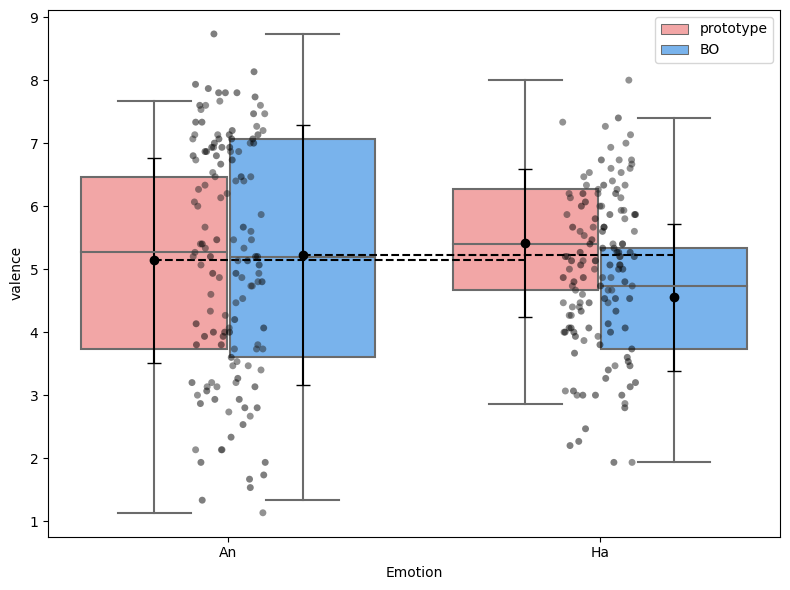

arousal
   participant_id emotion_category emotion_type     value
0            my01               An    prototype  3.800000
1            my01               An           BO  5.200000
2            my01               Ha    prototype  1.933333
3            my01               Ha           BO  2.266667
4            my02               An    prototype  5.266667
..            ...              ...          ...       ...
87           my25               Ha           BO  6.066667
88           my26               An    prototype  4.933333
89           my26               An           BO  5.466667
90           my26               Ha    prototype  4.266667
91           my26               Ha           BO  3.733333

[92 rows x 4 columns]


/usr/local/Caskroom/miniconda/base/envs/pybert/lib/python3.8/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


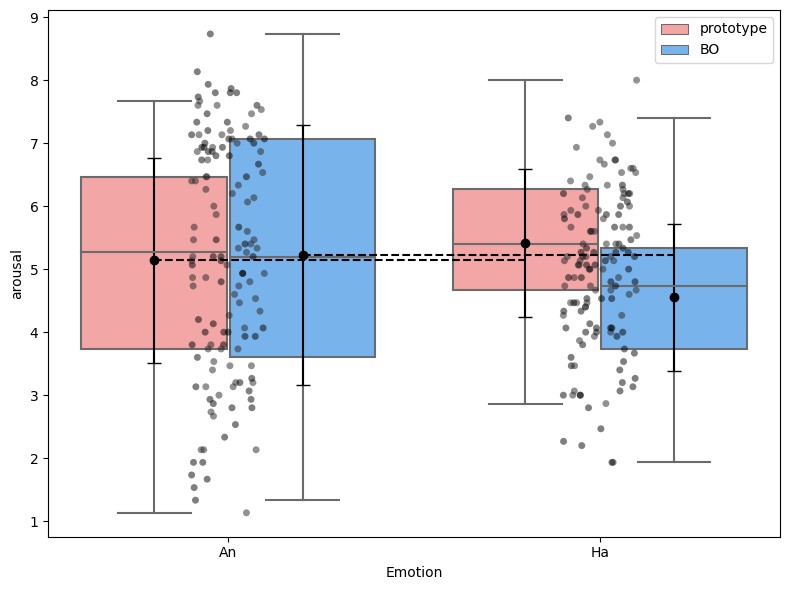

humanlike
   participant_id emotion_category emotion_type     value
0            my01               An    prototype  7.200000
1            my01               An           BO  7.000000
2            my01               Ha    prototype  4.466667
3            my01               Ha           BO  4.533333
4            my02               An    prototype  5.666667
..            ...              ...          ...       ...
87           my25               Ha           BO  4.066667
88           my26               An    prototype  2.133333
89           my26               An           BO  1.933333
90           my26               Ha    prototype  3.000000
91           my26               Ha           BO  1.933333

[92 rows x 4 columns]


/usr/local/Caskroom/miniconda/base/envs/pybert/lib/python3.8/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:black'` for same effect.
  warnings.warn(msg, FutureWarning)


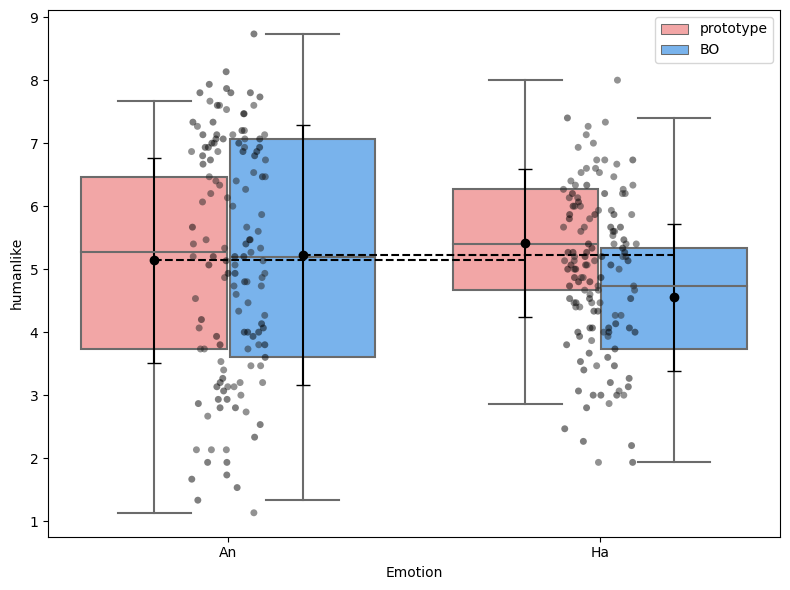

In [42]:
# generate figures
import pandas as pd

# Load the data
df = pd.read_csv('mimicry_aver_long.csv')
measure_types = df['measure'].unique()
print(measure_types)
for measure in measure_types:
    print(measure)
    df_measure = df[df['measure'] == measure].drop(columns=['index','measure'])
    df_measure.reset_index(inplace=True)
    # exclude index column
    df_measure.drop(columns=['index', 'code'], inplace=True)

    print(df_measure)

    # Create the figure
    plt.figure(figsize=(8, 6))

    # Create the boxplot
    sns.boxplot(x='emotion_category', y='value', hue='emotion_type', data=df, palette=['#ff9999', '#66b3ff'], showfliers=False)

    # Add scatter plot
    sns.stripplot(x='emotion_category', y='value', hue='emotion_type', data=df, color='black', alpha=0.5)

    # Add error bars
    for i, emotion in enumerate(['An', 'Ha']):
        for j, condition in enumerate(['prototype', 'BO']):
            subset = df[(df['emotion_category'] == emotion) & (df['emotion_type'] == condition)]
            mean_valence = subset['value'].mean()
            std_valence = subset['value'].std()
            position = i - 0.2 + j * 0.4
            plt.errorbar(x=position, y=mean_valence, yerr=std_valence, fmt='o', color='black', capsize=5)
            if i == 0:
                plt.plot([position, position + 1], [mean_valence, mean_valence], linestyle='--', color='black')

    # Label the axes
    plt.xlabel('Emotion')
    plt.ylabel(measure)

    # Adjust legend
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles[0:2], labels[0:2])

    # Show the plot
    plt.tight_layout()
    plt.show()

In [76]:
!pip install seaborn --upgrade

  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


[<matplotlib.patches.Rectangle object at 0x7f988b0f0e50>, <matplotlib.patches.Rectangle object at 0x7f988b3bf610>] ['prototype', 'BO']
[<matplotlib.patches.Rectangle object at 0x7f988a3e6220>, <matplotlib.patches.Rectangle object at 0x7f98882055b0>] ['prototype', 'BO']
[<matplotlib.patches.Rectangle object at 0x7f9881df24f0>, <matplotlib.patches.Rectangle object at 0x7f987fc96df0>] ['prototype', 'BO']


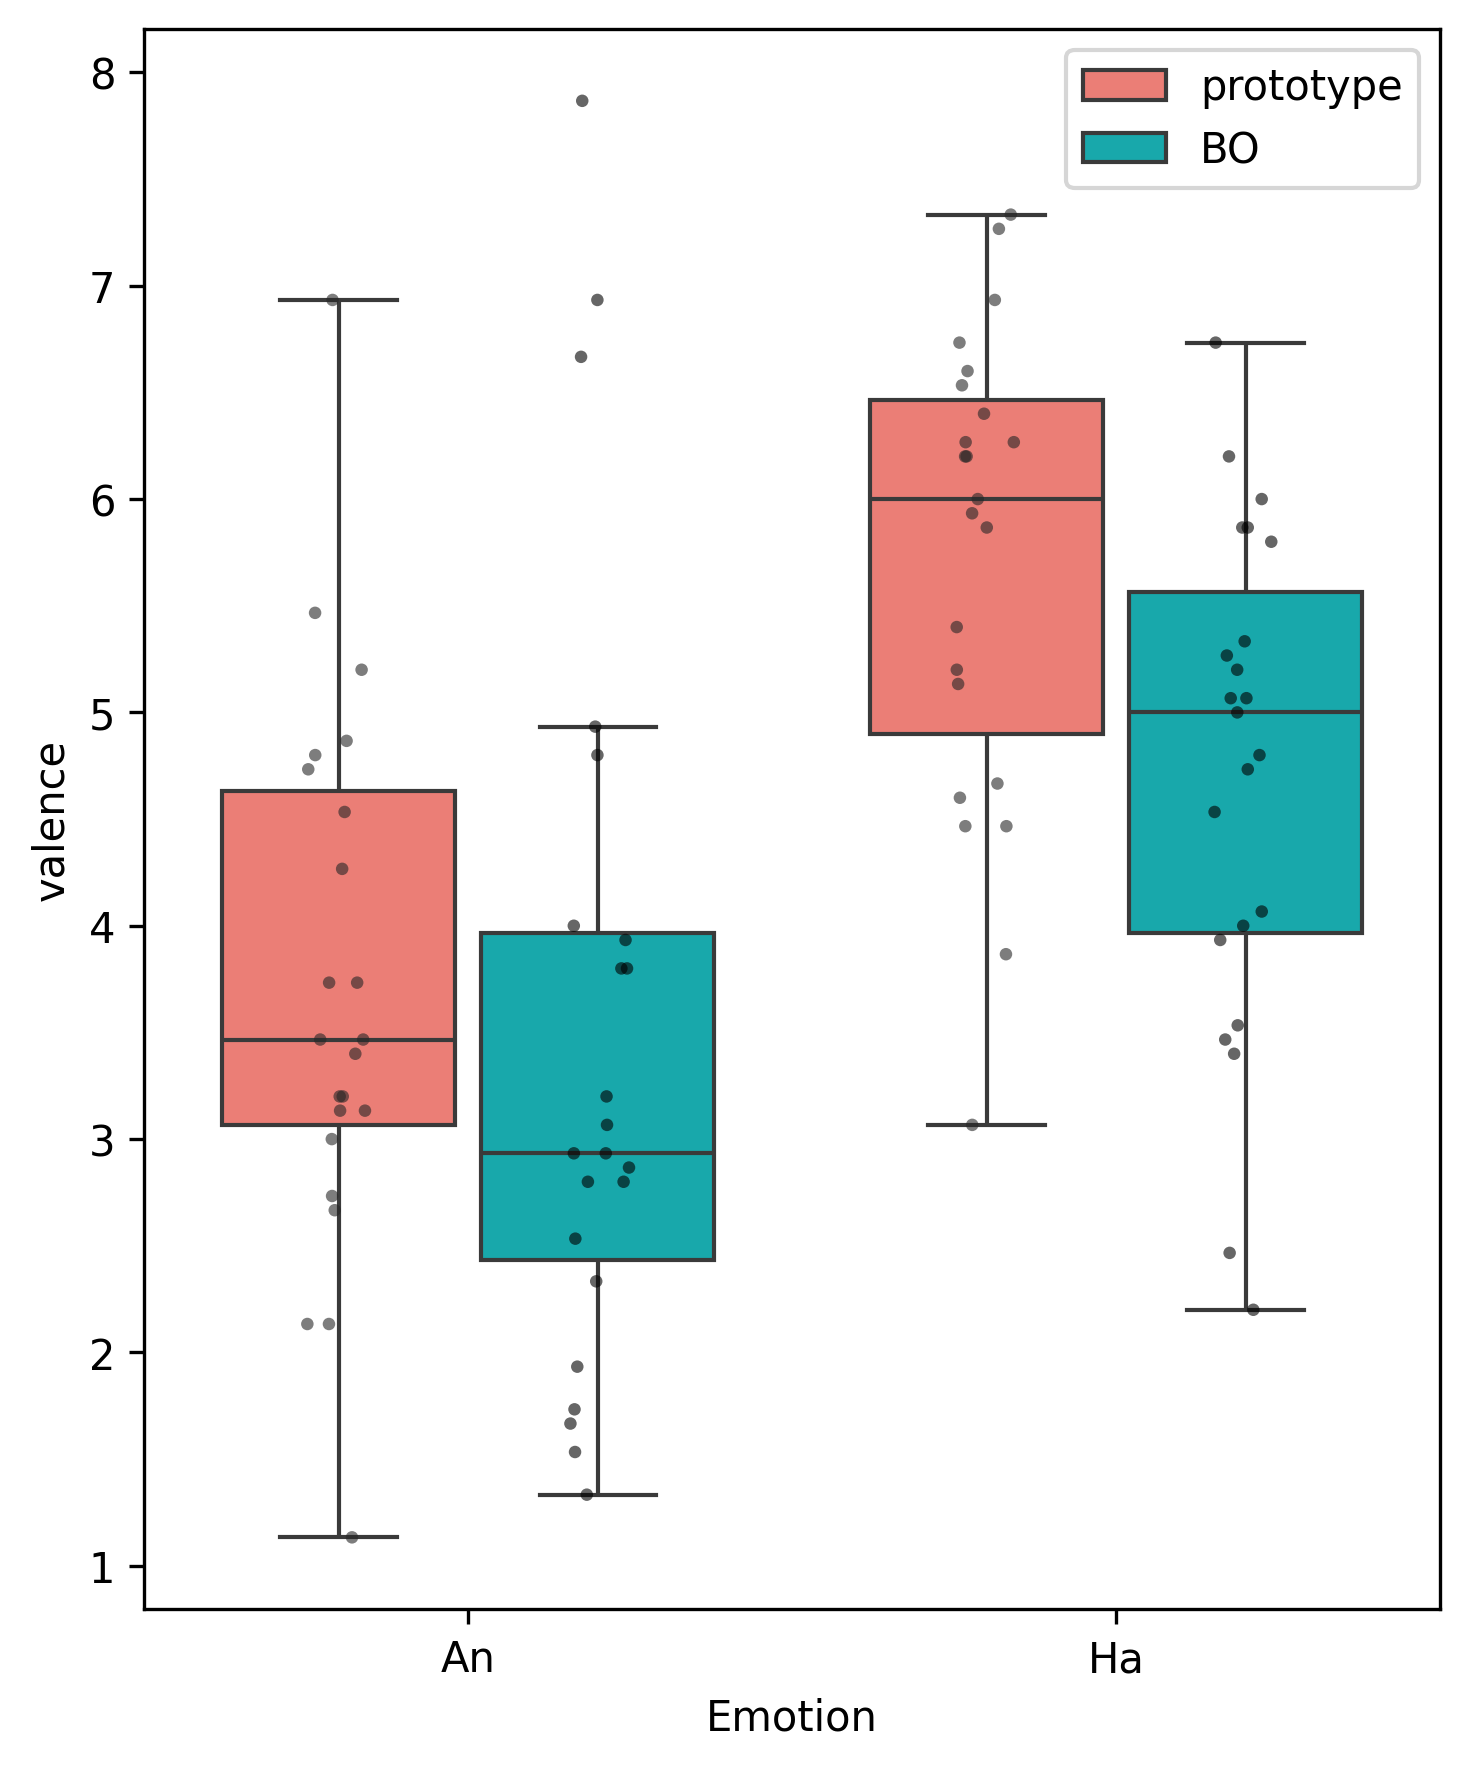

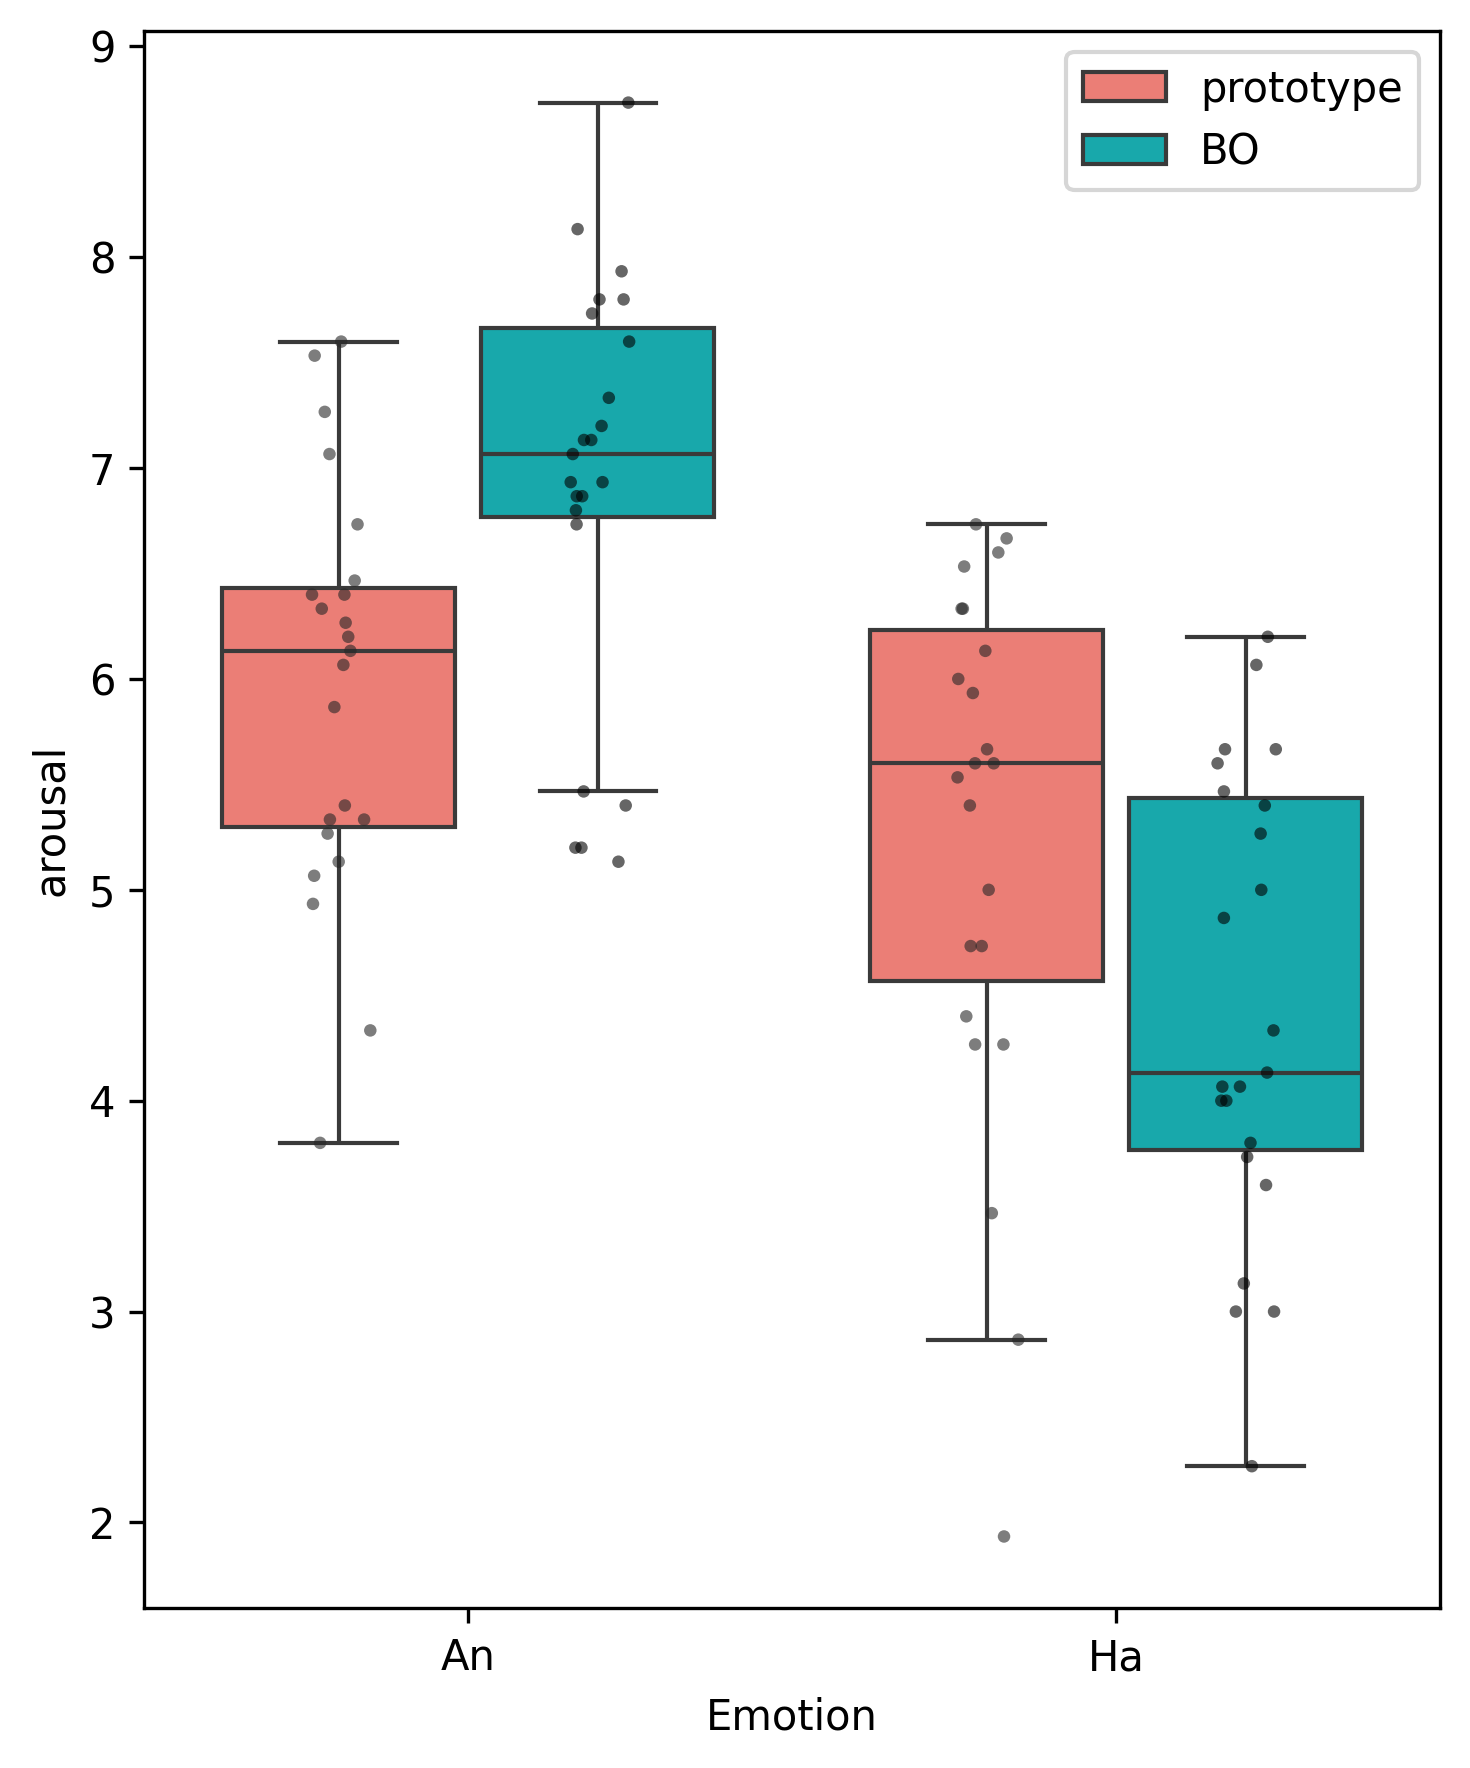

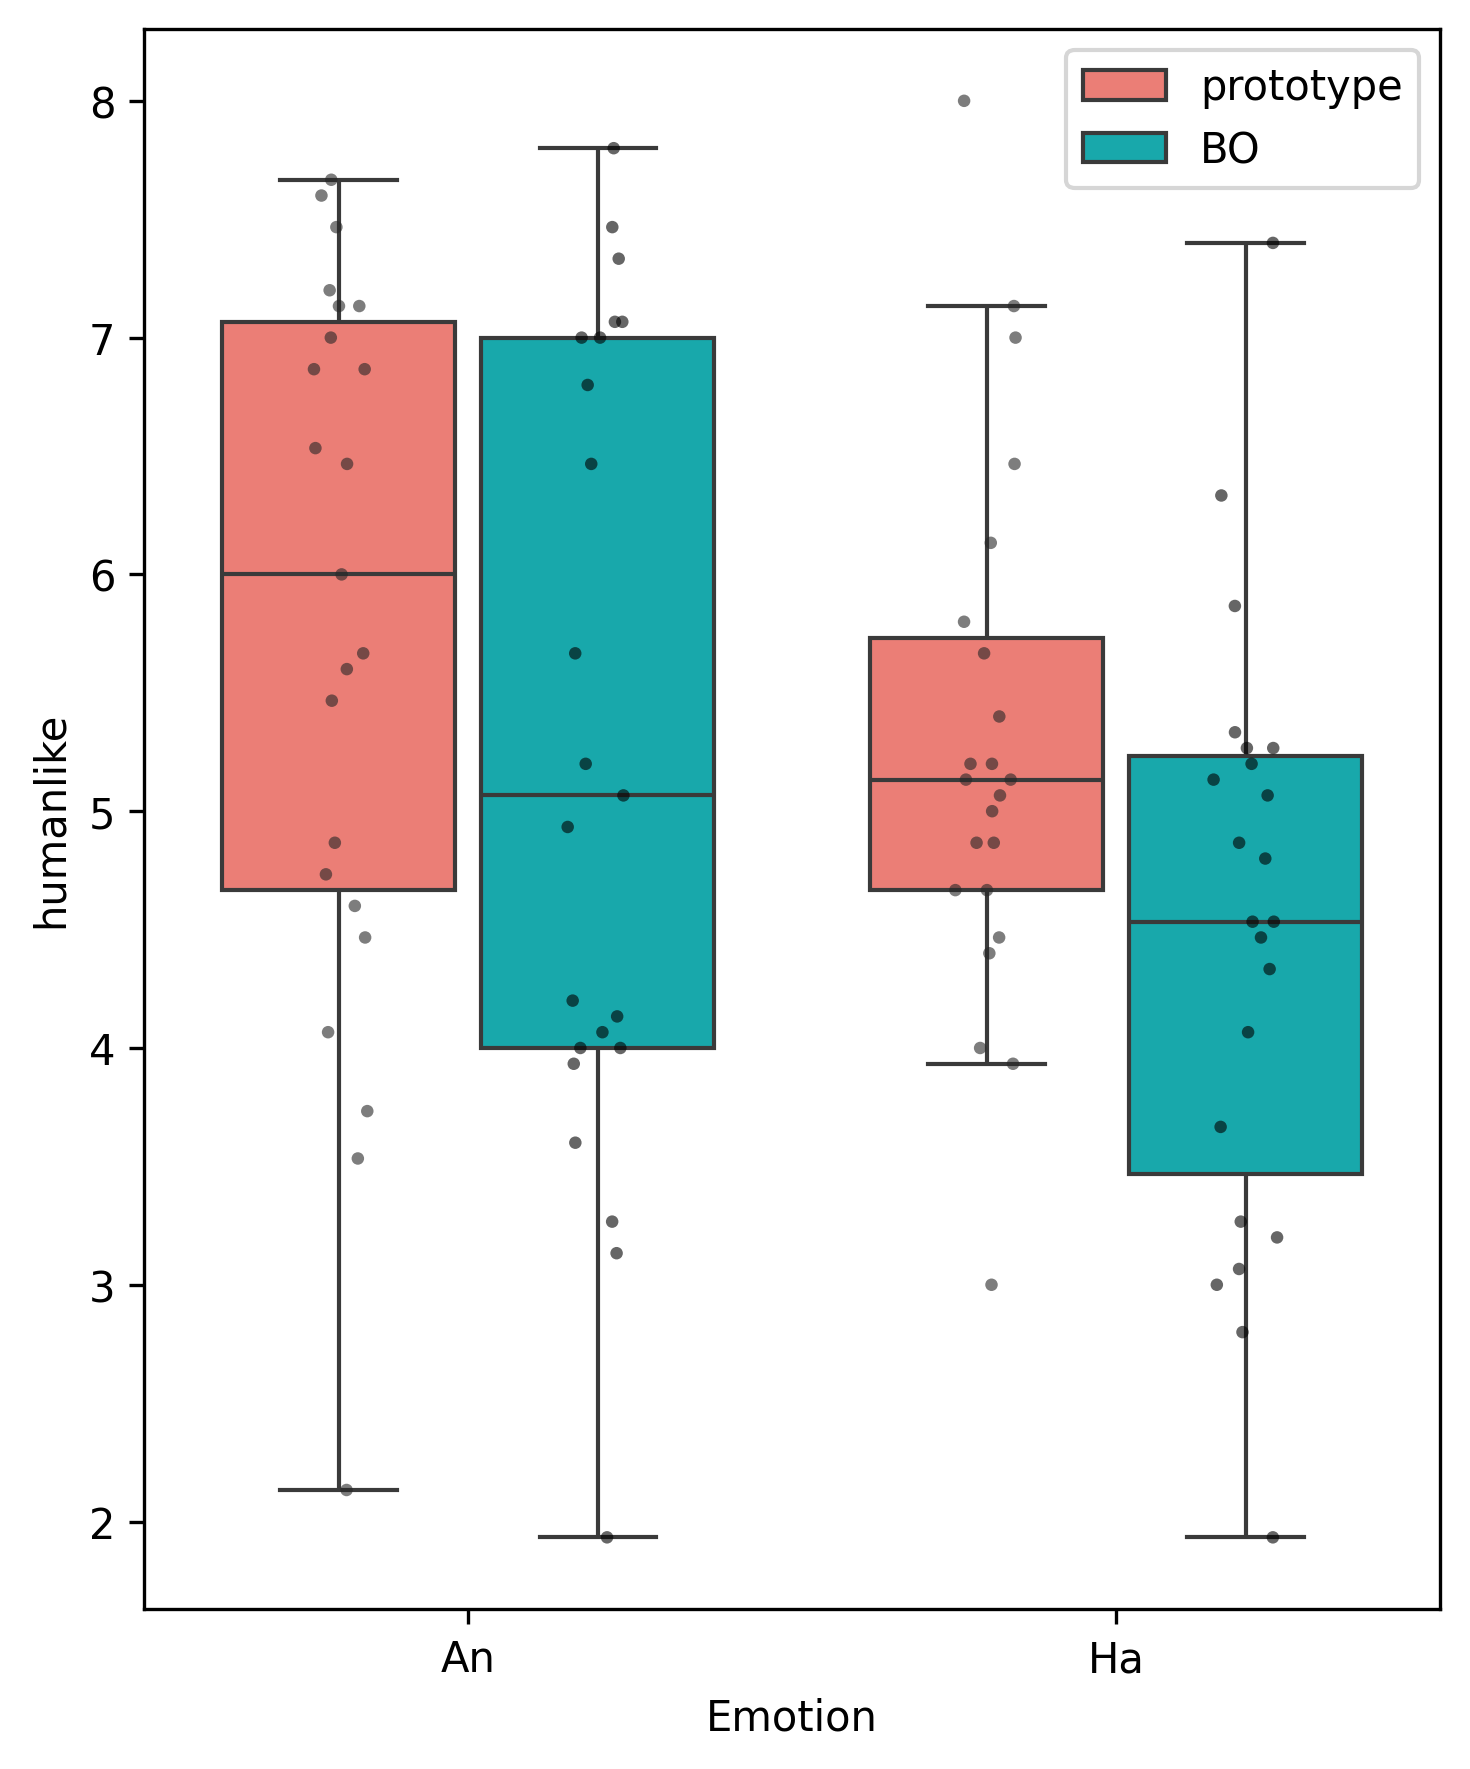

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('mimicry_aver_long.csv')
measure_types = df['measure'].unique()

for measure in measure_types:
    df_measure = df[df['measure'] == measure].drop(columns=['index', 'measure'])
    df_measure.reset_index(inplace=True)
    df_measure.drop(columns=['index', 'code'], inplace=True)

    # Create the figure
    plt.figure(figsize=(5, 6), dpi=300)

    # Create the boxplot
    sns.boxplot(x='emotion_category', y='value', hue='emotion_type', data=df_measure, palette=['#ff6d62', '#00BFC3'], gap=.1 , showfliers=False)

    # Add scatter plot
    sns.stripplot(x='emotion_category', y='value', hue='emotion_type', data=df_measure, dodge=True, marker='o', alpha=0.6, palette='dark:black', jitter=True, orient='v', size=3)

    # # Adjusting the scatter plot and error bar positions
    # for i, emotion in enumerate(['An', 'Ha']):
    #     for j, condition in enumerate(['prototype', 'BO']):
    #         subset = df_measure[(df_measure['emotion_category'] == emotion) & (df_measure['emotion_type'] == condition)]
    #         mean_valence = subset['value'].mean()
    #         std_valence = subset['value'].std()
    #         position = i + 0.2 + j * 0.3  # Adjust position for right side effect
    #         plt.errorbar(x=position, y=mean_valence, yerr=std_valence, fmt='o', color='black', capsize=5, markersize=6)
    # if j == 0:
            #     plt.plot([position, position + 0.4], [mean_valence, mean_valence], linestyle='--', color='black')

    # Label the axes
    plt.xlabel('Emotion')
    plt.ylabel(measure)

    # Adjust legend
    handles, labels = plt.gca().get_legend_handles_labels()
    print(handles[0:2], labels[0:2])
    plt.legend(handles[0:2], labels[0:2])

    # Show the plot
    plt.tight_layout()
#     plt.show()
    plt.savefig(f'subject_rating_{measure}.png')


/var/folders/wb/jy1t2kqj0lv_nb556t9s93w40000gn/T/ipykernel_31106/663096642.py:22: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(x='Emotion', y='Valence Ratings', hue='Condition', data=df, ax=axes[0], dodge=True, jitter=True, color='black', marker='o', alpha=0.5)
/var/folders/wb/jy1t2kqj0lv_nb556t9s93w40000gn/T/ipykernel_31106/663096642.py:36: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(x='Emotion', y='Arousal Ratings', hue='Condition', data=df, ax=axes[1], dodge=True, jitter=True, color='black', marker='o', alpha=0.5)


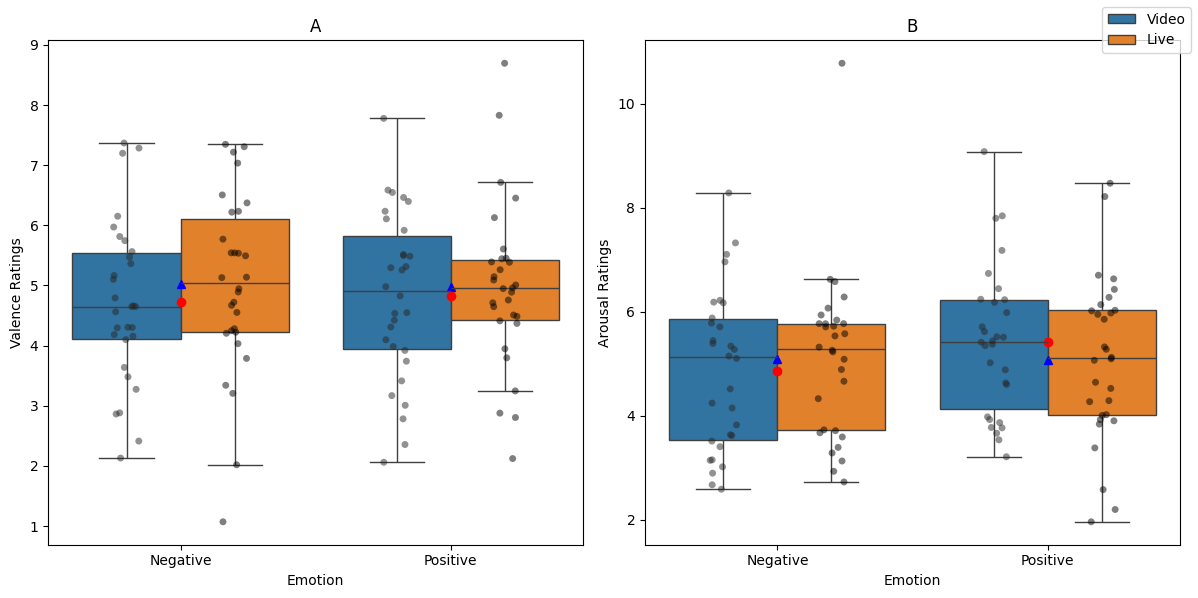

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Example data creation
np.random.seed(42)
data = {
    'Emotion': ['Negative'] * 30 + ['Positive'] * 30 + ['Negative'] * 30 + ['Positive'] * 30,
    'Condition': ['Video'] * 60 + ['Live'] * 60,
    'Valence Ratings': np.random.normal(5, 1.5, 120),
    'Arousal Ratings': np.random.normal(5, 1.5, 120)
}

df = pd.DataFrame(data)

# Create the figure
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot Valence Ratings
sns.boxplot(x='Emotion', y='Valence Ratings', hue='Condition', data=df, ax=axes[0], showfliers=False)
sns.stripplot(x='Emotion', y='Valence Ratings', hue='Condition', data=df, ax=axes[0], dodge=True, jitter=True, color='black', marker='o', alpha=0.5)
axes[0].set_title('A')
axes[0].legend_.remove()

# Add group mean values
means = df.groupby(['Emotion', 'Condition'])['Valence Ratings'].mean().reset_index()
for i, row in means.iterrows():
    if row['Condition'] == 'Video':
        axes[0].plot([row['Emotion']], [row['Valence Ratings']], 'o', color='red')
    else:
        axes[0].plot([row['Emotion']], [row['Valence Ratings']], '^', color='blue')

# Plot Arousal Ratings
sns.boxplot(x='Emotion', y='Arousal Ratings', hue='Condition', data=df, ax=axes[1], showfliers=False)
sns.stripplot(x='Emotion', y='Arousal Ratings', hue='Condition', data=df, ax=axes[1], dodge=True, jitter=True, color='black', marker='o', alpha=0.5)
axes[1].set_title('B')
axes[1].legend_.remove()

# Add group mean values
means = df.groupby(['Emotion', 'Condition'])['Arousal Ratings'].mean().reset_index()
for i, row in means.iterrows():
    if row['Condition'] == 'Video':
        axes[1].plot([row['Emotion']], [row['Arousal Ratings']], 'o', color='red')
    else:
        axes[1].plot([row['Emotion']], [row['Arousal Ratings']], '^', color='blue')

# Adjust legend
handles, labels = axes[1].get_legend_handles_labels()
fig.legend(handles[:2], labels[:2], loc='upper right')

plt.tight_layout()
plt.show()
